In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import nltk
import string
import tensorflow_hub as hub
import tensorflow as tf
import sklearn

# Import libraries & data 

In [469]:
data = pd.read_csv("D:/kaggle_datasets/nlp-getting-started/train.csv")
X_test = pd.read_csv("D:/kaggle_datasets/nlp-getting-started/test.csv")
submission = pd.read_csv("D:/kaggle_datasets/nlp-getting-started/sample_submission.csv")
y = data["target"]

In [376]:
data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [163]:
X = data["text"]

In [164]:
X[:5]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

## Delete noise

In [165]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
X = pd.Series(map(clean_text, X))

In [166]:
X[:5]

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
dtype: object

# Tokenize

In [167]:
X = [nltk.word_tokenize(sentence) for sentence in X]

In [168]:
pd.DataFrame(X[:5])

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,our,deeds,are,the,reason,of,this,earthquake,may,allah,...,all,None,None,None,None,None,None,None,None,None
1,forest,fire,near,la,ronge,sask,canada,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,all,residents,asked,to,shelter,in,place,are,being,notified,...,no,other,evacuation,or,shelter,in,place,orders,are,expected
3,people,receive,wildfires,evacuation,orders,in,california,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,just,got,sent,this,photo,from,ruby,alaska,as,smoke,...,pours,into,a,school,None,None,None,None,None,None


## Delete stopwords

In [169]:
nltk.corpus.stopwords.words('english')[:5]

['i', 'me', 'my', 'myself', 'we']

In [170]:
def remove_stopwords(text):
    words = [w for w in text if w not in nltk.corpus.stopwords.words('english')]
    return words

X = list(map(remove_stopwords, X))

In [171]:
pd.DataFrame(X[:5])

,0,1,2,3,4,5,6,7,8,9,10
0,deeds,reason,earthquake,may,allah,forgive,us,None,None,None,None
1,forest,fire,near,la,ronge,sask,canada,None,None,None,None
2,residents,asked,shelter,place,notified,officers,evacuation,shelter,place,orders,expected
3,people,receive,wildfires,evacuation,orders,california,None,None,None,None,None
4,got,sent,photo,ruby,alaska,smoke,wildfires,pours,school,None,None


# Integer encoding

In [172]:
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

In [173]:
pd.DataFrame(X[:5])

,0,1,2,3,4,5,6,7,8,9,10
0,4164,724,143,53,1512,4165,12.0,NaN,NaN,NaN,NaN
1,95,4,125,579,6288,6289,1188.0,NaN,NaN,NaN,NaN
2,1513,1391,1881,530,6290,1514,149.0,1881.0,530.0,1189.0,911.0
3,8,4166,1190,149,1189,23,NaN,NaN,NaN,NaN,NaN
4,20,1021,228,6291,1882,156,1190.0,6292.0,96.0,NaN,NaN


In [174]:
tokenizer.word_index

{'like': 1,
 'amp': 2,
 'im': 3,
 'fire': 4,
 'get': 5,
 'new': 6,
 'via': 7,
 'people': 8,
 'one': 9,
 'dont': 10,
 'news': 11,
 'us': 12,
 'video': 13,
 'emergency': 14,
 'disaster': 15,
 'police': 16,
 'would': 17,
 'still': 18,
 'body': 19,
 'got': 20,
 'burning': 21,
 'back': 22,
 'california': 23,
 'crash': 24,
 'suicide': 25,
 'storm': 26,
 'time': 27,
 'know': 28,
 'man': 29,
 'day': 30,
 'first': 31,
 'buildings': 32,
 'rt': 33,
 'going': 34,
 'bomb': 35,
 'cant': 36,
 'world': 37,
 'see': 38,
 'nuclear': 39,
 'fires': 40,
 'love': 41,
 'youtube': 42,
 'attack': 43,
 'two': 44,
 'killed': 45,
 'go': 46,
 'dead': 47,
 'train': 48,
 'full': 49,
 'car': 50,
 'war': 51,
 'families': 52,
 'may': 53,
 'accident': 54,
 'good': 55,
 'today': 56,
 'hiroshima': 57,
 'think': 58,
 'life': 59,
 'many': 60,
 'say': 61,
 'watch': 62,
 'last': 63,
 'could': 64,
 'u': 65,
 'na': 66,
 'years': 67,
 'want': 68,
 'make': 69,
 'way': 70,
 'collapse': 71,
 'home': 72,
 'work': 73,
 'look': 74,
 'n

Average langth of tweet: 8.932221200577958


(array([2.160e+02, 6.370e+02, 1.172e+03, 2.213e+03, 1.472e+03, 1.160e+03,
        6.730e+02, 6.200e+01, 6.000e+00, 2.000e+00]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

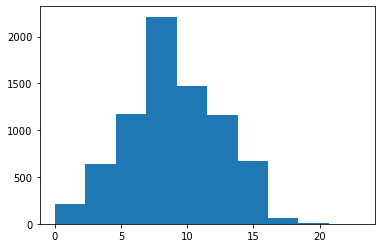

In [175]:
print("Average langth of tweet:", sum(map(len, X))/len(X))
plt.hist([len(tweet) for tweet in X])

Text(0.5, 1.0, 'Fake')

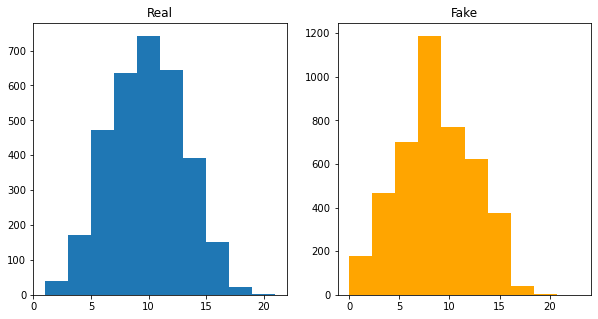

In [176]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist([len(X[i]) for i in range(len(X)) if y[i]==1])
ax1.set_title("Real")
ax2.hist([len(X[i]) for i in range(len(X)) if y[i]==0], color="orange")
ax2.set_title("Fake")

In [177]:
count=0
for tweet in X:
    if len(tweet) > 20:
        count+=1
print((len(X)-count) / len(X))

0.9997372914751084


In [178]:
X = keras.preprocessing.sequence.pad_sequences(X, maxlen=20, padding="post")

In [179]:
def preprocess(text_sequence):
    text_sequence = pd.Series(map(clean_text, text_sequence))    
    text_sequence = [nltk.word_tokenize(sentence) for sentence in text_sequence]
    text_sequence = list(map(remove_stopwords, text_sequence))    
    text_sequence =  tokenizer.texts_to_sequences(text_sequence)
    text_sequence = keras.preprocessing.sequence.pad_sequences(text_sequence, maxlen=20, padding="post") 
    return text_sequence

In [180]:
X_for_tree = data[["keyword", "location"]]

# Model tuning  
이전의 모델이 1번의 LSTM 반복, 100개의 은닉상태, 30epoch를 사용하였으므로 이를 똑같이 사용하여 성능 비교

In [358]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, random_state=42)
X_train_tree, X_valid_tree, y_train, y_valid = train_test_split(X_for_tree, y, stratify=y, random_state=42)

In [359]:
k_encoder = LabelEncoder()
X_train_tree["keyword"] = k_encoder.fit_transform(X_train_tree["keyword"])
X_valid_tree["keyword"] = k_encoder.transform(X_valid_tree["keyword"])

In [360]:
l_encoder = LabelEncoder()
X_train_tree["location"] = l_encoder.fit_transform(X_train_tree["location"])

In [361]:
temp = np.array(X_valid_tree["location"])

In [362]:
for index in range(len(temp)):
    if temp[index] not in l_encoder.classes_:
        temp[index] = np.nan

In [363]:
X_valid_tree["location"] = temp

In [364]:
# l_encoder.classes_ = np.append(l_encoder.classes_, "<unknown>")

In [365]:
X_valid_tree["location"] = l_encoder.transform(X_valid_tree["location"])

In [453]:
def make_model(iter = 1, hidden=100):
    Input = keras.Input(shape=[20])

    x = keras.layers.Reshape((20, 1))(Input)
    
    for _ in range(iter):
        x = keras.layers.Bidirectional(keras.layers.LSTM(hidden, return_sequences=True))(x)
        
    x = keras.layers.Bidirectional(keras.layers.LSTM(hidden))(x)
    x = keras.layers.Dense((hidden+40)/2, activation="relu")(x)
    output = keras.layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs=Input, outputs=output)
    model.compile(loss="binary_crossentropy", metrics="accuracy", optimizer="adam")
    return model

In [454]:
model = make_model(1, 100)
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30)

Epoch 1/30
179/179 [==============================] - 9s 22ms/step - loss: 0.6780 - accuracy: 0.5751 - val_loss: 0.6685 - val_accuracy: 0.5809
Epoch 2/30
179/179 [==============================] - 2s 14ms/step - loss: 0.6644 - accuracy: 0.5940 - val_loss: 0.6576 - val_accuracy: 0.6150
Epoch 3/30
179/179 [==============================] - 2s 14ms/step - loss: 0.6635 - accuracy: 0.5957 - val_loss: 0.6551 - val_accuracy: 0.6129
Epoch 4/30
179/179 [==============================] - 2s 14ms/step - loss: 0.6599 - accuracy: 0.6033 - val_loss: 0.6569 - val_accuracy: 0.6029
Epoch 5/30
179/179 [==============================] - 2s 14ms/step - loss: 0.6617 - accuracy: 0.5994 - val_loss: 0.6594 - val_accuracy: 0.6008
Epoch 6/30
179/179 [==============================] - 2s 14ms/step - loss: 0.6599 - accuracy: 0.6096 - val_loss: 0.6518 - val_accuracy: 0.6150
Epoch 7/30
179/179 [==============================] - 2s 14ms/step - loss: 0.6580 - accuracy: 0.5992 - val_loss: 0.6517 - val_accuracy: 0.6087

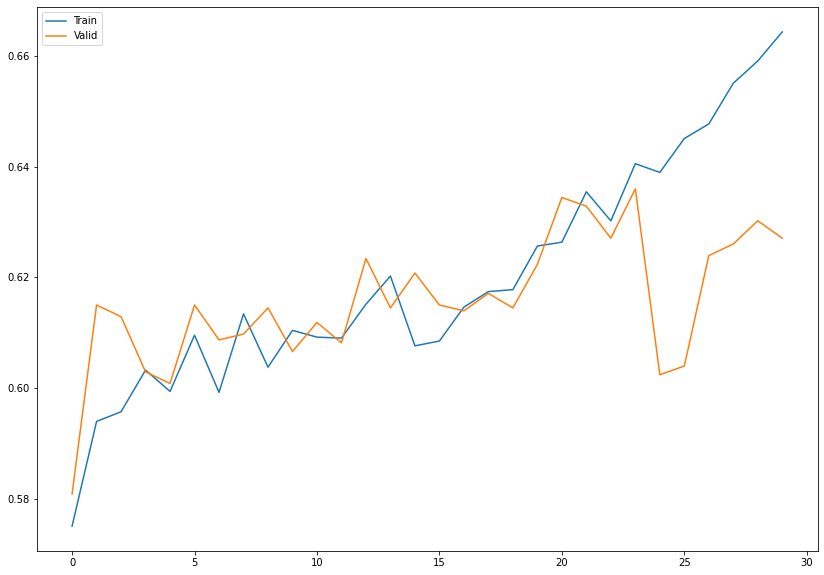

In [455]:
plt.figure(figsize=(14, 10))
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Valid")
plt.legend()

In [30]:
model.evaluate(X_valid, y_valid)

60/60 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6124


[0.6504083871841431, 0.6123949289321899]

In [290]:
tree_model = RandomForestClassifier()
tree_model.fit(X_train_tree, y_train)

RandomForestClassifier()

In [292]:
tree_model.score(X_valid_tree, y_valid)

0.717436974789916

In [322]:
tree_score = tree_model.predict_proba(X_valid_tree)

In [319]:
ann_score = np.concatenate((1-model.predict(X_valid), model.predict(X_valid)), axis=1)

In [320]:
ann_score

array([[0.5627253 , 0.43727466],
       [0.34820747, 0.6517925 ],
       [0.55540824, 0.44459176],
       ...,
       [0.5391065 , 0.46089348],
       [0.44866562, 0.5513344 ],
       [0.45832926, 0.54167074]], dtype=float32)

In [323]:
tree_score

array([[0.6594319 , 0.3405681 ],
       [0.69279116, 0.30720884],
       [0.51989213, 0.48010787],
       ...,
       [0.31667785, 0.68332215],
       [0.        , 1.        ],
       [0.4935119 , 0.5064881 ]])

In [330]:
sklearn.metrics.accuracy_score(np.argmax(ann_score + tree_score, axis=1), y_valid)

0.7452731092436975

# Submission 

In [456]:
model = make_model(1, 100)
model.fit(X,y, epochs=30)

Epoch 1/30
238/238 [==============================] - 8s 13ms/step - loss: 0.6705 - accuracy: 0.5903
Epoch 2/30
238/238 [==============================] - 3s 13ms/step - loss: 0.6620 - accuracy: 0.6050
Epoch 3/30
238/238 [==============================] - 3s 13ms/step - loss: 0.6595 - accuracy: 0.6013
Epoch 4/30
238/238 [==============================] - 3s 12ms/step - loss: 0.6586 - accuracy: 0.6037
Epoch 5/30
238/238 [==============================] - 3s 12ms/step - loss: 0.6602 - accuracy: 0.5998
Epoch 6/30
238/238 [==============================] - 3s 12ms/step - loss: 0.6562 - accuracy: 0.6019
Epoch 7/30
238/238 [==============================] - 3s 12ms/step - loss: 0.6560 - accuracy: 0.6101
Epoch 8/30
238/238 [==============================] - 3s 12ms/step - loss: 0.6580 - accuracy: 0.5998
Epoch 9/30
238/238 [==============================] - 3s 12ms/step - loss: 0.6547 - accuracy: 0.6083
Epoch 10/30
238/238 [==============================] - 3s 12ms/step - loss: 0.6540 - accura

In [458]:
k_encoder = LabelEncoder()
train_keyword = k_encoder.fit_transform(data["keyword"])
l_encoder = LabelEncoder()
train_location = l_encoder.fit_transform(data["location"])

In [459]:
tree_model = RandomForestClassifier()
tree_model.fit(np.transpose(np.append([train_keyword], [train_location], axis=0)), y)

RandomForestClassifier()

In [470]:
X_test_text = preprocess(X_test["text"])

In [471]:
temp = np.array(X_test["location"])

In [472]:
for index in range(len(temp)):
    if temp[index] not in l_encoder.classes_:
        temp[index] = np.nan

In [473]:
X_test["location"] = temp

In [474]:
X_test["keyword"] = k_encoder.transform(X_test["keyword"])
X_test["location"] = l_encoder.transform(X_test["location"])

In [475]:
ann_score = np.concatenate((1-model.predict(X_test_text), model.predict(X_test_text)), axis=1)

In [476]:
tree_score = tree_model.predict_proba(X_test[["keyword", "location"]])

C:\Users\hjhhi\anaconda3\envs\python3.9.0\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [479]:
Final_score = np.argmax(tree_score+ann_score, axis=1)

In [480]:
submission["target"] = Final_score

In [481]:
submission.to_csv("./Ensemble_rnn_tree.csv", index=None)

In [482]:
submission["target"].value_counts()

0    2166
1    1097
Name: target, dtype: int64